In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
from astropy.io import fits, ascii
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from tqdm import tqdm


#cosmological parameters, not used anywhere but nice to have
H0 = 70.0  # Hubble constant in km/s/Mpc
Om0 = 0.3  # Matter density parameter
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)


I have redshift and LERG/HERG classification for 18,286 galaxies from the Best and Heckman catalogue ('table1.dat')  
Additionally, I have the stellar mass data from the parent sample, which consists of 927,552 galaxies ('totlgm_dr7_v5_2.fit').   
**I would like to get stellar mass from parent sample only for this (18286 galaxies= 'table1.dat')**    

**in maxplank site it says File description:**  
The files are FITS binary tables with keys P2P5, P16, MEDIAN, P84, P97P5, MODE and AVG which returns the 2.5, 16, 50, 84, 97.5 percentiles, the mode and the average of the PDF of Log Mstar respectively.  
**the 'gal_info' FITS binary structure.**   
This file contains a variety of information related to SDSS targeting, including plate number, Modified Julian Date, fiber number, photometric information, redshift, velocity dispersion, and more  
the **'gal_info'** and **'totlgm_dr7_v5_2.fit'** files correspond one-to-one, it means that each entry in 'gal_info' has a corresponding entry in 'totlgm_dr7_v5_2.fit'.  
Save the DataFrame to a CSV file
#dfs.to_csv('totlgm_dr7_v5_2.csv', index=False)

In [24]:
stelm = 'totlgm_dr7_v5_2.fit'
hdul = fits.open(stelm)
data = hdul[1].data
#print(data.names)

gal_info= 'gal_info_dr7_v5_2.fit'
hdul = fits.open(gal_info)
data1 = hdul[1].data
#print(data1.names)

table_data = ascii.read('table1.dat')
#print(table_data.columns)
#print(type(table_data))
table_data_pandas = table_data.to_pandas()
#print(type(table_data_pandas))

#print("Data types for totlgm_dr7_v5_2.fit:", data.formats)
#print("Data types for gal_info_dr7_v5_2.fit:", data1.formats)

print('min =',np.min(data['AVG']),'max=',np.max(data['AVG']))
>min = -1.0 max= 12.949085

In [27]:
dfs = pd.DataFrame(data) #stellar mass into a pandas data frame
dgal = pd.DataFrame(data) #gal.info into a pandas data frame
#table = Table(data1)  # Convert it to an Astropy Table, not needed now


In [29]:
#these are the columns I want from dfs and dgal
selected_dfs_columns = ['AVG']  
selected_dgal_columns = ['PLATEID', 'MJD', 'FIBERID', 'RA', 'DEC', 'Z']
com = ['PLATEID', 'MJD', 'FIBERID']
com2 =['RA', 'DEC', 'Z']

dfs['AVG'] = dfs['AVG'].astype('float64')
dgal[com] = dgal[com].astype('int64')
dgal[com2] = dgal[com2].astype('float64')

In [ ]:
#desired columns from dfs and dgal
dfs_selected = dfs[selected_dfs_columns]
dgal_selected = dgal[selected_dgal_columns]

# Concatenate the selected DataFrames and now we have only only df1 from both the data sets i also renamed some columns for easier acess
df1 = pd.concat([dgal_selected, dfs_selected], axis=1)
column_map = {'PLATEID': 'plate_id', 'MJD': 'mjd', 'FIBERID': 'fiberid','RA' :'ra' ,'DEC': 'dec','Z' : 'redshift' ,'AVG':'stellar.mass'}
df1 = df1.rename(columns=column_map)
#df1.to_csv('df1.csv', index=False) to look how the data looks in laptopby converting it to csv 
# i now have 927552 rows × 7 columns df1

In [ ]:
df1

,plate_id,mjd,fiberid,ra,dec,redshift,stellar.mass
0,266,51602,1,146.714203,-1.041304,0.021275,10.308453
1,266,51602,2,146.919449,-0.990492,0.213925,11.176508
2,266,51602,4,146.859833,-0.808902,0.126554,11.391095
3,266,51602,5,146.763397,-0.810433,0.448645,-1.000000
4,266,51602,6,146.963898,-0.545003,0.055988,9.972836
...,...,...,...,...,...,...,...
927547,2974,54592,633,260.743164,31.944035,0.033870,-1.000000
927548,2974,54592,635,260.800568,31.898993,0.159622,-1.000000
927549,2974,54592,636,260.716003,32.024277,0.167358,-1.000000
927550,2974,54592,637,260.697235,32.285629,0.111548,-1.000000


In [ ]:
df22 = pd.DataFrame(table_data_pandas)# this makes a dictionary mapping old column names to new column names
column_mapping = {'col1': 'plate_id', 'col2': 'mjd', 'col3': 'fiberid','col4' :'ra' ,'col5': 'dec','col6' : 'redshift' ,'col11':'RLAGN','col12': 'main-sample','col13':'LERG','col14':'HERG'}

#Again Rename the columns using the rename method
df22 = df22.rename(columns=column_mapping)
df22['ra'] = df22['ra'] * 15 
#print(df1.dtypes)
#print(df2.dtypes)

In [ ]:
# 'main_sample' tells us if the observation belongs to the SDSS catalougue, hence these values should belong to mpa-jhu
df2 = df22[df22['main-sample'] == 1]
#df2.to_csv('df2.csv', index=False)
#print(df2)
#[9168 rows x 14 columns] my df2 

**round off ra and dec values **

In [ ]:
# 'ra' and 'dec' round off  
df1_rounded = df1.round({'ra': 8, 'dec': 8, 'redshift': 8})  
df2_rounded = df2.round({'ra': 8, 'dec': 8, 'redshift': 8})  

#Check unique values of df1 and df2  
uniquedf1 = df1_rounded.drop_duplicates()  
uniquedf2 = df2_rounded.drop_duplicates()  
 
print("Unique values in df1:")  
print("\nUnique values in df2:")

Unique values in df1:

Unique values in df2:


# cleaning and filtering data

In [ ]:
filtered_df = uniquedf1[(uniquedf1['fiberid'] >= 0) & (uniquedf1['fiberid'] <= 600) & (uniquedf1['mjd'] >= 0) & (uniquedf1['plate_id'] >= 0)  ]
filtered_df = filtered_df.reset_index(drop=True)

df1_cleaned = filtered_df.dropna() # Drop rows with missing values
#this is to remove rows with extreme 'ra' and 'dec'
valid_ra_range = (-180, 180)
valid_dec_range = (-90, 90)

df1_clean = df1_cleaned[
    (df1_cleaned['ra'] >= valid_ra_range[0]) & (df1_cleaned['ra'] <= valid_ra_range[1]) &
    (df1_cleaned['dec'] >= valid_dec_range[0]) & (df1_cleaned['dec'] <= valid_dec_range[1])
]
df1_clean = df1_clean.reset_index(drop=True)
print(df1_clean)


        plate_id    mjd  fiberid          ra        dec  redshift  \
0            266  51602        1  146.714203  -1.041304  0.021275   
1            266  51602        2  146.919449  -0.990492  0.213925   
2            266  51602        4  146.859833  -0.808902  0.126554   
3            266  51602        5  146.763397  -0.810433  0.448645   
4            266  51602        6  146.963898  -0.545003  0.055988   
...          ...    ...      ...         ...        ...       ...   
418562      2961  54550      579  140.669754  33.549381  0.686346   
418563      2961  54550      584  140.886368  33.253998  0.687618   
418564      2961  54550      591  140.841644  33.419449  0.158441   
418565      2961  54550      592  140.986954  33.179546  0.172692   
418566      2961  54550      593  140.866867  33.095028  0.304777   

        stellar.mass  
0          10.308453  
1          11.176508  
2          11.391095  
3          -1.000000  
4           9.972836  
...              ...  
418562    

In [ ]:
tolerance = 1e-7

#this Sort both dataframes based on the 'redshift' column
#df1_clean_sorted = df1_clean.sort_values('redshift')
#df2_sorted = df2.sort_values('redshift')

# Merge based on common columns and the redshift condition using merge_asof
#merged_df = pd.merge_asof(df1_clean_sorted, df2_sorted, by=com1, on='redshift', suffixes=('_df1', '_df2'), direction='nearest', tolerance=tolerance)



In [ ]:
##merged_df

In [ ]:
com1 = ['mjd', 'fiberid', 'plate_id']

merged_df = pd.merge(df1_clean, df2, on=com1, suffixes=('_df1', '_df2'), how='inner')
#merged_df_tolerance = pd.merge(df1_clean, df2, how='inner', 
 #                              left_on=(df1_clean['redshift'] >= df2['redshift'] - tolerance) & (df1_clean['redshift'] <= df2['redshift'] + tolerance),
 #                              right_on=(df2['redshift'] >= df1_clean['redshift'] - tolerance) & (df2['redshift'] <= df1_clean['redshift'] + tolerance))
#merged_df.to_csv('merged_df.csv', index=False)


In [ ]:
merged_df

,plate_id,mjd,fiberid,ra_df1,dec_df1,redshift_df1,stellar.mass,ra_df2,dec_df2,redshift_df2,col7,col8,col9,col10,RLAGN,main-sample,LERG,HERG
0,266,51602,26,146.956070,-0.342300,0.134831,11.163173,146.956070,-0.34230,0.13483,0.0963,1,0.1010,1.26,1,1,1,0
1,266,51602,100,146.143585,-0.741641,0.203890,11.788676,146.143586,-0.74164,0.20389,0.0068,1,0.0025,0.46,1,1,1,0
2,266,51602,109,146.737122,-0.252183,0.130481,11.310987,146.737122,-0.25218,0.13048,0.0075,1,0.0043,0.51,1,1,0,0
3,266,51602,150,146.373779,-0.368387,0.053024,11.081721,146.373780,-0.36839,0.05302,0.0104,1,0.0010,2.02,0,1,0,0
4,266,51602,235,145.601196,-0.001389,0.145914,10.955780,145.601196,-0.00139,0.14591,0.0054,1,0.0049,0.43,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,2886,54498,291,162.600983,8.633535,0.167641,-1.000000,162.600990,8.63354,0.16764,0.0365,2,0.0000,-1.00,1,1,1,0
3961,2886,54498,334,162.869766,10.293123,0.086641,-1.000000,162.869760,10.29312,0.08664,0.0148,1,0.0068,0.11,1,1,1,0
3962,2886,54498,502,163.955154,9.660362,0.090655,-1.000000,163.955160,9.66036,0.09066,0.0300,1,0.0283,0.15,1,1,1,0
3963,2956,54525,398,147.493515,46.340588,0.015423,9.643180,147.493515,46.34059,0.01542,0.0093,1,0.0092,6.79,0,1,0,0


In [ ]:
#limits on stellar mass
stellar_mass_lower_limit = 10.25  
stellar_mass_upper_limit = 12.0  


stellarmass = merged_df['stellar.mass']
radio_loud_AGN_indicator = merged_df['RLAGN']

# Bin the galaxies based on stellar mass
valid_mask = (stellarmass >= stellar_mass_lower_limit) & (stellarmass <= stellar_mass_upper_limit)
valid_stellarmass = stellarmass[valid_mask]
valid_radio_loud_AGN_indicator = radio_loud_AGN_indicator[valid_mask]

bins = np.linspace(stellar_mass_lower_limit, stellar_mass_upper_limit, num=10) # bins for stellar mass , we will calculate RLAGN fraction for each bin
digitized = np.digitize(valid_stellarmass, bins)

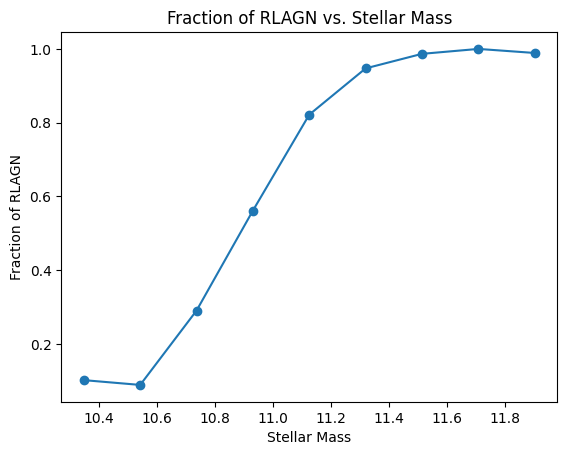

In [ ]:
#an array to hold the fraction of RLAGN for each bin
rlagn_fractions = []

# Calculate the fraction of RLAGN for each bin
for bin in range(1, len(bins)):
    in_bin = digitized == bin  # Find galaxies in the current bin
    total_in_bin = np.sum(in_bin)  # Total number of galaxies in the bin
    rlagn_in_bin = np.sum(valid_radio_loud_AGN_indicator[in_bin])  # RLAGN in the bin 
    fraction = rlagn_in_bin / total_in_bin if total_in_bin > 0 else 0
    rlagn_fractions.append(fraction)

mid_points = 0.5 * (bins[:-1] + bins[1:])  # Calculate mid-points of bins for x-axis
plt.plot(mid_points, rlagn_fractions, marker='o')
plt.xlabel('Stellar Mass')
plt.ylabel('Fraction of RLAGN')
plt.title('Fraction of RLAGN vs. Stellar Mass')
plt.show()


# plot for HERG/ LERG

In [30]:
gal_indx= 'gal_indx_dr7_v5_2.fit'
hdul = fits.open(gal_indx)
data2 = hdul[1].data
#print(data2.names)